Import necessary libraries

In [114]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, gaussian_kde
from scipy import stats
import seaborn as sns
from collections import Counter

Import parsed sample data

In [115]:
input_mileage_path = "toyota_mileage.csv"

# parse the data header
with open(input_mileage_path, mode='r', encoding='utf-8') as csv_input:
    reader = csv.reader(csv_input)
    data_header = next(reader)

# Using NumPy's genfromtxt method to read the file and extract the first column
list_mileage = np.genfromtxt(input_mileage_path, delimiter=',', skip_header=1, usecols=(0), dtype=None, encoding='utf-8')

header = data_header[0]

print("the full population data is -> ", list_mileage)
# print("the full population data is -> ", list_price)
print("the header of this data is -> ", header)

the full population data is ->  [24089 18615 27469 ... 46000 60700 45128]
the header of this data is ->  mileage


Generates 10% simple random sample

In [116]:
sample_size = int( len(list_mileage) * 0.10 )
sample_data = np.random.choice( list_mileage, size=sample_size, replace=False )
print("our population size is -> ", list_mileage.size)

our population size is ->  6738


In parallel, take out the outliers

In [117]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(sample_data, 25)
Q3 = np.percentile(sample_data, 75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the sample data to remove outliers
sample_data_cleaned = sample_data[(sample_data >= lower_bound) & (sample_data <= upper_bound)]

Generates a histogram for the sample

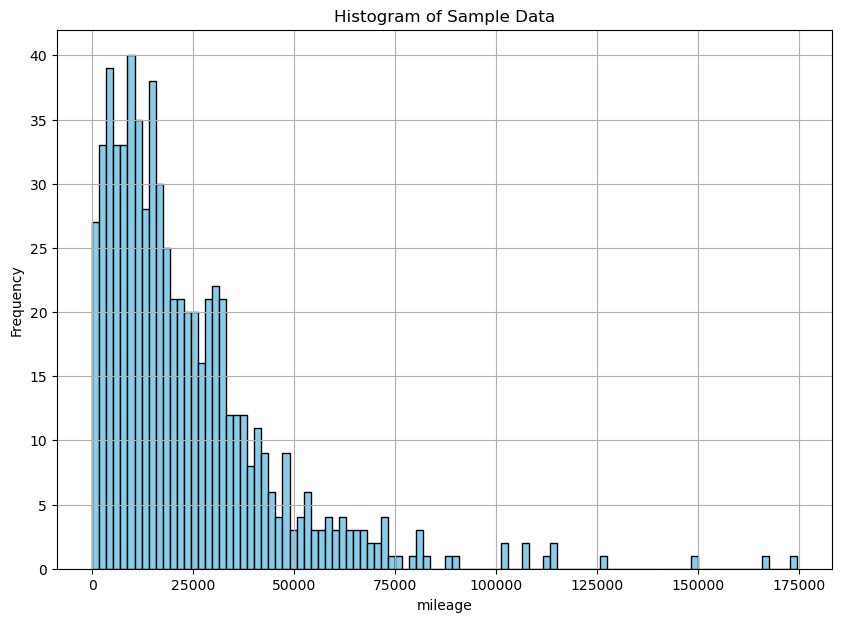

In [118]:
plt.figure(figsize=(10, 7))  # Set the figure size for better readability
plt.hist(sample_data, bins=100, color='skyblue', edgecolor='black')  # adjust the number of bins for better granularity
plt.title('Histogram of Sample Data')
plt.xlabel(header)  # Using the column header as the x-axis label
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("SampleHistogram.jpg")
plt.show()

Generates a histogram for the sample (without outliers)

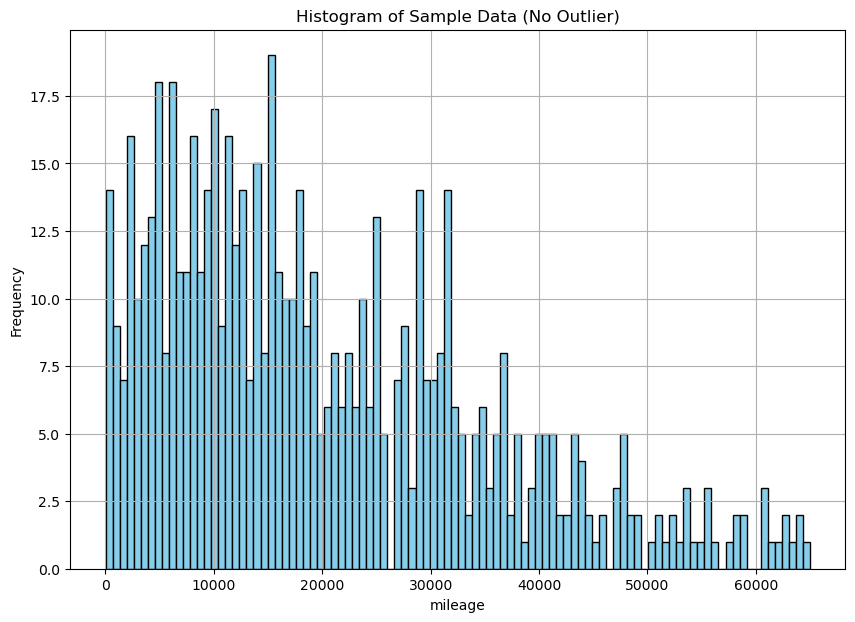

In [119]:
plt.figure(figsize=(10, 7))  # Set the figure size for better readability
plt.hist(sample_data_cleaned, bins=100, color='skyblue', edgecolor='black')  # adjust the number of bins for better granularity
plt.title('Histogram of Sample Data (No Outlier)')
plt.xlabel(header)  # Using the column header as the x-axis label
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("SampleHistogram_NoOutlier.jpg")
plt.show()

Generates a box-whisker plot

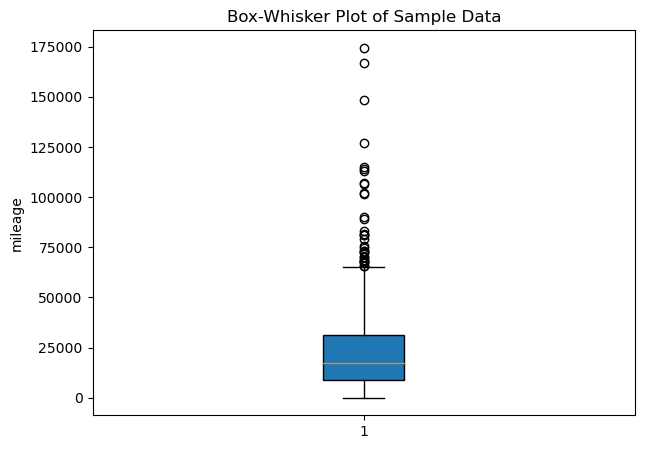

In [120]:
plt.figure(figsize=(7, 5))  # Set the figure size for better readability
plt.boxplot(sample_data, vert=True, patch_artist=True)  # 'vert=True' for vertical box plot
plt.title('Box-Whisker Plot of Sample Data')
plt.ylabel(header)  # Using the column header as the y-axis label
plt.savefig("SampleBoxWhisker.jpg")
plt.show()

Generates a box-whisker plot (without outliers)

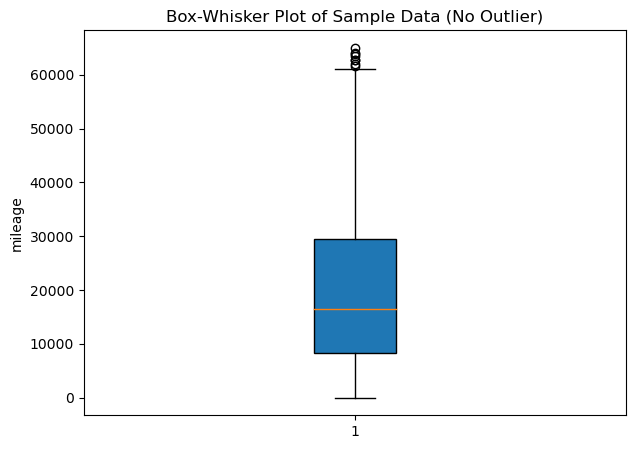

In [121]:
plt.figure(figsize=(7, 5))  # Set the figure size for better readability
plt.boxplot(sample_data_cleaned, vert=True, patch_artist=True)  # 'vert=True' for vertical box plot
plt.title('Box-Whisker Plot of Sample Data (No Outlier)')
plt.ylabel(header)  # Using the column header as the y-axis label
plt.savefig("SampleBoxWhisker_NoOutlier.jpg")
plt.show()

Density plot of the sample data

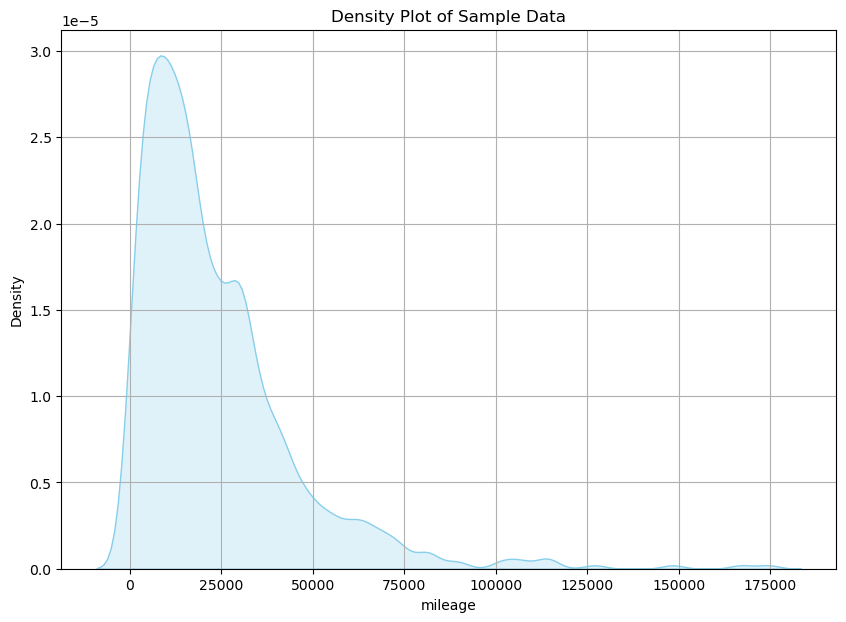

In [122]:
plt.figure(figsize=(10, 7))
sns.kdeplot(sample_data, bw_adjust=0.5, fill=True, color='skyblue')
plt.title('Density Plot of Sample Data')
plt.xlabel(header)
plt.ylabel('Density')
plt.grid(True)
plt.savefig("SampleDensity.jpg")
plt.show()

Density plot of the sample data (without outliers)

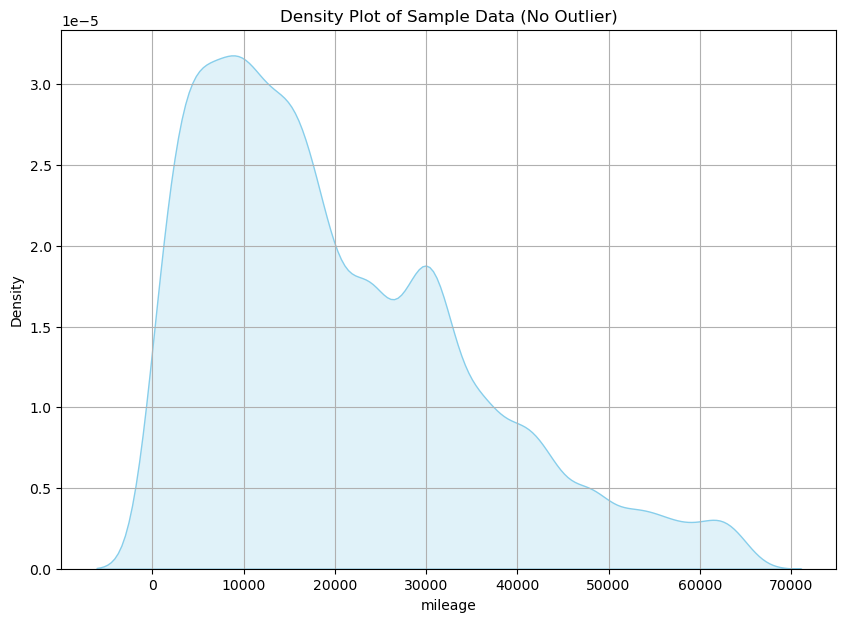

In [123]:
plt.figure(figsize=(10, 7))
sns.kdeplot(sample_data_cleaned, bw_adjust=0.5, fill=True, color='skyblue')
plt.title('Density Plot of Sample Data (No Outlier)')
plt.xlabel(header)
plt.ylabel('Density')
plt.grid(True)
plt.savefig("SampleDensity_NoOutlier.jpg")
plt.show()

Generates a Q-Q plot

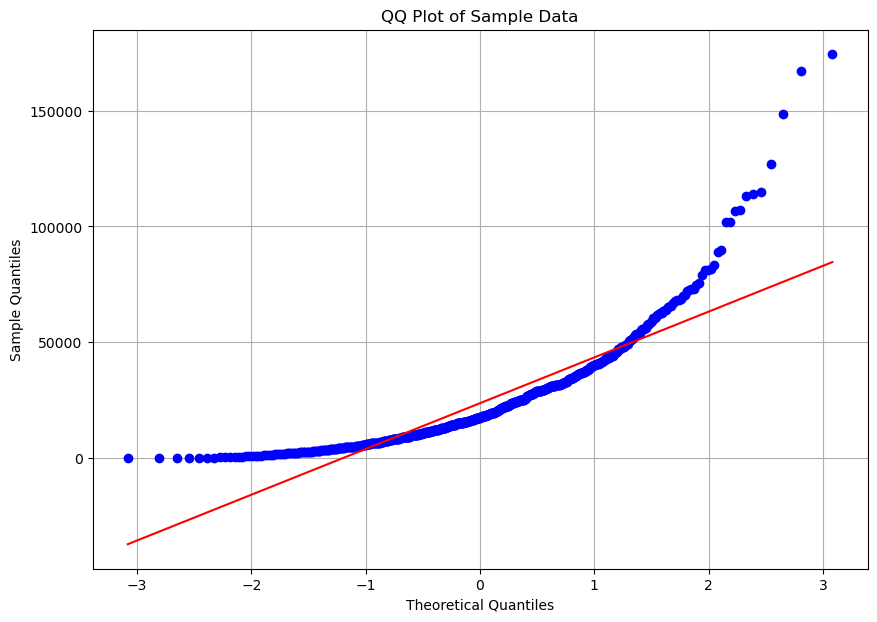

In [124]:
plt.figure(figsize=(10, 7))
probplot(sample_data, dist="norm", plot=plt)
plt.title('QQ Plot of Sample Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.savefig("SampleQQ.jpg")
plt.show()

Generates a Q-Q plot (without outliers)

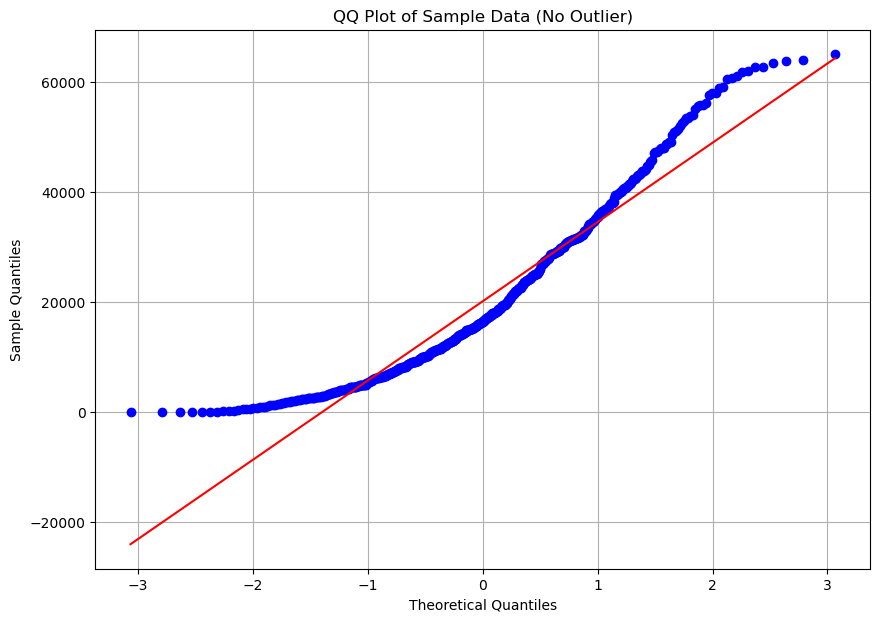

In [125]:
plt.figure(figsize=(10, 7))
probplot(sample_data_cleaned, dist="norm", plot=plt)
plt.title('QQ Plot of Sample Data (No Outlier)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.savefig("SampleQQ_NoOutlier.jpg")
plt.show()

Generates a graph for PDF and CDF

In [126]:
data_sorted = np.sort(sample_data)
cumulative = np.arange(1, len(data_sorted)+1) / len(data_sorted)

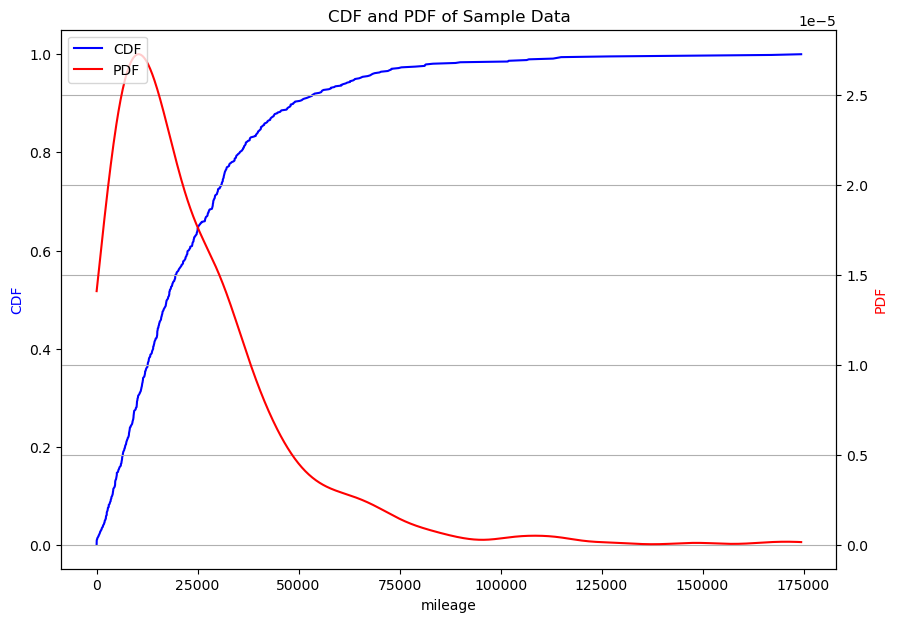

In [127]:
# Kernel Density Estimation for the PDF
density = gaussian_kde(sample_data)
density.covariance_factor = lambda: .25
density._compute_covariance()
x_vals = np.linspace(min(sample_data), max(sample_data), 1000)
pdf_vals = density(x_vals)

# Plotting both CDF and PDF on the same graph
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot CDF
ax1.plot(data_sorted, cumulative, color='blue', label='CDF')
ax1.set_xlabel(header)
ax1.set_ylabel('CDF', color='blue')

# Create another y-axis for the PDF
ax2 = ax1.twinx()
ax2.plot(x_vals, pdf_vals, color='red', label='PDF')
ax2.set_ylabel('PDF', color='red')

# Optional: Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('CDF and PDF of Sample Data')
plt.grid(True)
plt.savefig("SampleCDFPDF.jpg")
plt.show()

Generates a graph for PDF and CDF (without outliers)

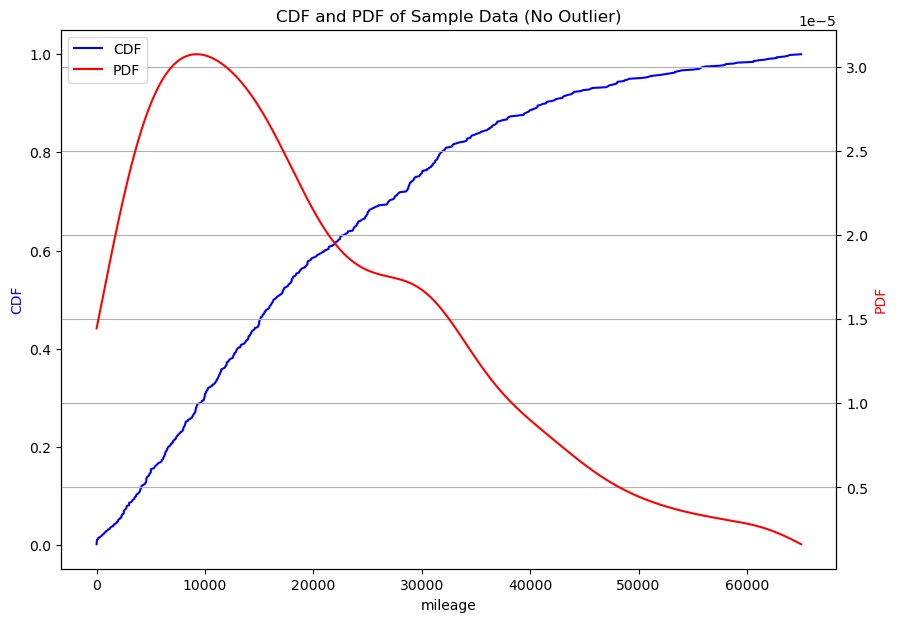

In [128]:
# Sorting the sample data
cleaned_data_sorted = np.sort(sample_data_cleaned)
# Calculating the cumulative probability for each data point
cumulative = np.arange(1, len(cleaned_data_sorted)+1) / len(cleaned_data_sorted)
# Kernel Density Estimation for the PDF

density = gaussian_kde(sample_data_cleaned)
density.covariance_factor = lambda: .25
density._compute_covariance()
x_vals = np.linspace(min(sample_data_cleaned), max(sample_data_cleaned), 1000)
pdf_vals = density(x_vals)

# Plotting both CDF and PDF on the same graph
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot CDF
ax1.plot(cleaned_data_sorted, cumulative, color='blue', label='CDF')
ax1.set_xlabel(header)
ax1.set_ylabel('CDF', color='blue')

# Create another y-axis for the PDF
ax2 = ax1.twinx()
ax2.plot(x_vals, pdf_vals, color='red', label='PDF')
ax2.set_ylabel('PDF', color='red')

# Optional: Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('CDF and PDF of Sample Data (No Outlier)')
plt.grid(True)
plt.savefig("SampleCDFPDF_NoOutlier.jpg")
plt.show()

Numerical analysis for un-adjusted sample data

In [129]:
# 1. Mean
mean = np.mean(sample_data)

# 2. Median
median = np.median(sample_data)

# 3. Mode (using SciPy for multi-modal data)
data_list_for_mode = sample_data.tolist()
data_counts = Counter(data_list_for_mode)
highest_frequency = data_counts.most_common(1)[0][1]
mode_value = [value for value, count in data_counts.items() if count == highest_frequency]

# 4. Percentiles (e.g., 25th, 50th, and 75th)
percentiles = np.percentile(sample_data, [25, 50, 75])

# 5. Quartiles (the same as the above percentiles)
quartiles = percentiles  # 25th, 50th, and 75th percentiles are Q1, Q2 (median), and Q3

# 6. Range
data_range = np.ptp(sample_data)

# 7. Variance
variance = np.var(sample_data, ddof=1)  # ddof=1 for sample variance

# 8. Standard Deviation
std_dev = np.sqrt(variance)

# 9. 1% Trimmed Mean
trimmed_mean_1 = stats.trim_mean(sample_data, 0.01)

# 10. 2.5% Trimmed Mean
trimmed_mean_25 = stats.trim_mean(sample_data, 0.025)

# Printing the results
print(f"Sample data type -> {sample_data.dtype}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Data Mode: {mode_value}, Data Count: {highest_frequency}")
print(f"25th, 50th, and 75th Percentiles: {percentiles}")
print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"1% Trimmed Mean: {trimmed_mean_1}")
print(f"2.5% Trimmed Mean: {trimmed_mean_25}")

Sample data type -> int64
Mean: 23626.031203566123
Median: 17558.0
Data Mode: [3000, 5000, 18000], Data Count: 4
25th, 50th, and 75th Percentiles: [ 8883. 17558. 31457.]
Range: 174416
Variance: 486750283.07194155
Standard Deviation: 22062.417888163156
1% Trimmed Mean: 22775.1845688351
2.5% Trimmed Mean: 21989.33073322933


Numerical analysis for adjusted sample data (eliminating outliers)

In [130]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(sample_data, 25)
Q3 = np.percentile(sample_data, 75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the sample data to remove outliers
sample_data_cleaned = sample_data[(sample_data >= lower_bound) & (sample_data <= upper_bound)]

# Perform numerical analysis on the cleaned data
mean_cleaned = np.mean(sample_data_cleaned)
median_cleaned = np.median(sample_data_cleaned)
percentiles_cleaned = np.percentile(sample_data_cleaned, [25, 50, 75])
quartiles_cleaned = percentiles_cleaned
range_cleaned = np.ptp(sample_data_cleaned)
variance_cleaned = np.var(sample_data_cleaned, ddof=1)
std_dev_cleaned = np.sqrt(variance_cleaned)
trimmed_mean_1_cleaned = stats.trim_mean(sample_data_cleaned, 0.01)
trimmed_mean_25_cleaned = stats.trim_mean(sample_data_cleaned, 0.025)
cleaned_data_list_for_mode = sample_data_cleaned.tolist()
cleaned_data_counts = Counter(cleaned_data_list_for_mode)
cleaned_highest_frequency = cleaned_data_counts.most_common(1)[0][1]
cleaned_mode_value = [value for value, count in cleaned_data_counts.items() if count == cleaned_highest_frequency]

# Printing the cleaned data results
print(f"Cleaned sample data type -> {sample_data_cleaned.dtype}")
print(f"Cleaned Mean: {mean_cleaned}")
print(f"Cleaned Median: {median_cleaned}")
print(f"Cleaned Data Mode: {cleaned_mode_value}, Cleaned Data Count: {cleaned_highest_frequency}")
print(f"Cleaned 25th, 50th, and 75th Percentiles: {percentiles_cleaned}")
print(f"Cleaned Range: {range_cleaned}")
print(f"Cleaned Variance: {variance_cleaned}")
print(f"Cleaned Standard Deviation: {std_dev_cleaned}")
print(f"1% Trimmed Mean (Cleaned): {trimmed_mean_1_cleaned}")
print(f"2.5% Trimmed Mean (Cleaned): {trimmed_mean_25_cleaned}")

Cleaned sample data type -> int64
Cleaned Mean: 20135.7546875
Cleaned Median: 16401.0
Cleaned Data Mode: [3000, 5000, 18000], Cleaned Data Count: 4
Cleaned 25th, 50th, and 75th Percentiles: [ 8231.25 16401.   29539.5 ]
Cleaned Range: 64993
Cleaned Variance: 221116815.03362435
Cleaned Standard Deviation: 14869.997143026772
1% Trimmed Mean (Cleaned): 19912.656050955415
2.5% Trimmed Mean (Cleaned): 19578.677631578947


Simple Bayesian Analysis

In [132]:
# industry belief in used vehicle mileage mean
mu_prior = 75000

# industry belief in uncertainty
sigma_prior = 15000

# observed data
mean_sample = mean  # sample mean
std_dev_sample = std_dev  # sample standard deviation
n_sample = sample_size  # sample size


# Calculating the posterior parameters
sigma_posterior = 1 / np.sqrt(1/sigma_prior**2 + n_sample/std_dev_sample**2)
mu_posterior = sigma_posterior**2 * (mu_prior/sigma_prior**2 + n_sample*mean_sample/std_dev_sample**2)

print(f"Posterior Mean (updated belief): {mu_posterior}")
print(f"Posterior Standard Deviation (uncertainty in belief): {sigma_posterior}")

Posterior Mean (updated belief): 23790.64186605666
Posterior Standard Deviation (uncertainty in belief): 849.080137655304


Confidence intervals consturction for 95%, 85%, 75%

In [133]:
mean_mileage = np.mean(list_mileage)
sem_mileage = stats.sem(list_mileage, ddof=1)  # Calculate the Standard Error of the Mean

# The sample size
n = len(list_mileage)
df = n - 1  # Degrees of freedom

# Confidence levels
conf_levels = [0.75, 0.85, 0.95]

# Calculate the t-critical values for different confidence levels
t_critical_75 = stats.t.ppf((1 + conf_levels[0]) / 2, df)
t_critical_85 = stats.t.ppf((1 + conf_levels[1]) / 2, df)
t_critical_95 = stats.t.ppf((1 + conf_levels[2]) / 2, df)

# Calculate the margin of error for each confidence level
me_75 = t_critical_75 * sem_mileage
me_85 = t_critical_85 * sem_mileage
me_95 = t_critical_95 * sem_mileage

# Construct the confidence intervals
ci_75 = (mean_mileage - me_75, mean_mileage + me_75)
ci_85 = (mean_mileage - me_85, mean_mileage + me_85)
ci_95 = (mean_mileage - me_95, mean_mileage + me_95)

# Print the confidence intervals
print(f"75% confidence interval: {ci_75}")
print(f"85% confidence interval: {ci_85}")
print(f"95% confidence interval: {ci_95}")

75% confidence interval: (22589.365232160246, 23125.462609929393)
85% confidence interval: (22521.9721367444, 23192.85570534524)
95% confidence interval: (22400.6701816749, 23314.157660414738)
